<a href="https://colab.research.google.com/github/taanila/tilastoapu/blob/master/testi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Tätä tarvitaan datan noutamiseksi Yahoon-palvelusta
# Varmista, että pandas-datareader on asennettu
import pandas_datareader.data as web

%matplotlib inline

# Tyyli vaikuttaa grafiikan ulkoasuun
# Käytettävissä olevat tyylit voit listata komennolla plt.style.available
plt.style.use('seaborn-whitegrid')

In [2]:
elisa = web.DataReader('ELISA.HE', start = '2015-1-1', data_source = 'yahoo')
telia = web.DataReader('TELIA1.HE', start = '2015-1-1', data_source = 'yahoo')

In [3]:
elisa

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,22.870001,22.549999,22.610001,22.680000,206279.0,17.464106
2015-01-05,22.850000,22.309999,22.700001,22.400000,249378.0,17.248501
2015-01-07,23.139999,22.100000,22.500000,22.920000,531047.0,17.648911
2015-01-08,23.200001,22.760000,22.900000,22.830000,381383.0,17.579609
2015-01-09,23.120001,22.760000,22.809999,22.860001,305832.0,17.602713
...,...,...,...,...,...,...
2021-02-16,50.380001,50.020000,50.020000,50.080002,231143.0,50.080002
2021-02-17,50.779999,49.759998,50.000000,50.700001,403652.0,50.700001
2021-02-18,50.740002,50.080002,50.740002,50.279999,349968.0,50.279999


In [4]:
telia

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,5.360,5.285,5.340,5.305,1039894.0,0.069424
2015-01-05,5.300,5.205,5.290,5.205,929121.0,0.068116
2015-01-07,5.300,5.220,5.240,5.245,860595.0,0.068639
2015-01-08,5.410,5.260,5.260,5.405,1001285.0,0.070733
2015-01-09,5.420,5.290,5.400,5.295,917754.0,0.069293
...,...,...,...,...,...,...
2021-02-16,3.555,3.512,3.551,3.521,1722454.0,3.521000
2021-02-17,3.530,3.497,3.526,3.505,1294807.0,3.505000
2021-02-18,3.502,3.438,3.493,3.460,3126379.0,3.460000


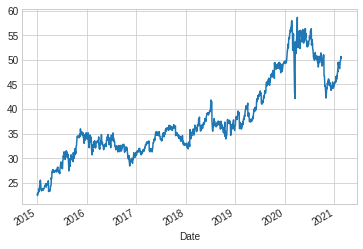

In [5]:
elisa['Close'].plot()

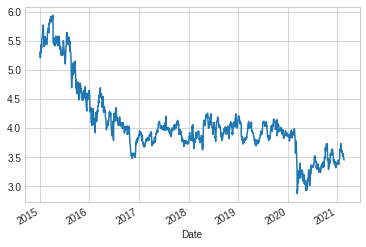

In [6]:
telia['Close'].plot()

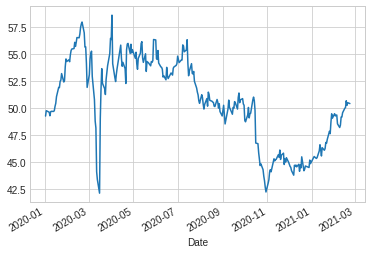

In [7]:
# Vuoden 2020 alusta
elisa['Close']['2020':].plot()

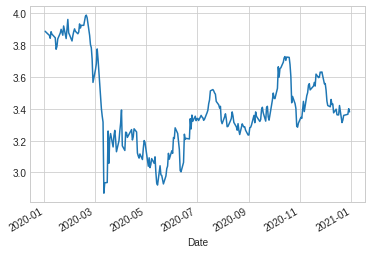

In [8]:
telia['Close']['2020'].plot()

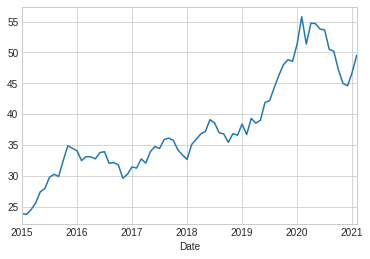

In [9]:
# Kuukausittaiset keskiarvohinnat
elisa['Close'].resample('M').mean().plot()

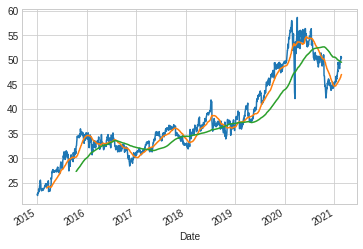

In [10]:
elisa['Close'].plot()

# Lisätään viivakaavioon 50 päivän ja 200 päivän liukuvat keskiarvot
elisa['Close'].rolling(50).mean().plot()
elisa['Close'].rolling(200).mean().plot()

In [11]:
# Hinnan muutokset prosentteina edellisestä päivästä
elisa['Elisa%'] = elisa['Close'].pct_change()
telia['Telia%'] = telia['Close'].pct_change()

In [12]:
# Yhdistän Elisan ja Telian muutosprosentit samaan dataframeen
muutokset = pd.concat([elisa['Elisa%'], telia['Telia%']], axis = 1)
muutokset

,Elisa%,Telia%
Date,,
2015-01-02,NaN,NaN
2015-01-05,-0.012346,-0.018850
2015-01-07,0.023214,0.007685
2015-01-08,-0.003927,0.030505
2015-01-09,0.001314,-0.020352
...,...,...
2021-02-16,0.001600,-0.009006
2021-02-17,0.012380,-0.004544
2021-02-18,-0.008284,-0.012839


Text(0, 0.5, 'Muutos')

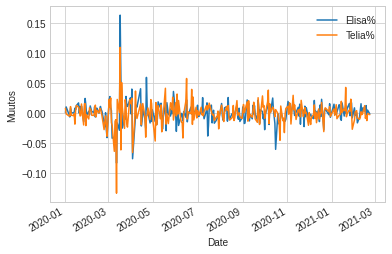

In [13]:
# Muutokset vuoden alusta
ax1 = muutokset['2020':].plot()

ax1.set_ylabel('Muutos')

In [14]:
# Tunnuslukuja muutosprosenteille
muutokset.describe()

,Elisa%,Telia%
count,1541.000000,1541.000000
mean,0.000631,-0.000175
std,0.015028,0.014406
min,-0.092226,-0.134499
25%,-0.006499,-0.007071
50%,0.000821,-0.000489
75%,0.008081,0.007382
max,0.164016,0.109976


In [15]:
# Päivät, jolloin muutosprosentti ollut suurempi kuin 5 %
muutokset[(abs(muutokset['Elisa%']) > 0.05) | (abs(muutokset['Telia%']) > 0.05)]

,Elisa%,Telia%
Date,,
2015-03-27,-0.075697,-0.012712
2015-04-09,0.011499,-0.066554
2015-04-16,0.055984,0.006346
2015-08-24,-0.055172,-0.058611
2015-08-25,0.065693,0.047335
2015-09-03,0.057869,0.032323
2015-09-25,0.061796,0.025510
2016-01-22,0.051540,0.037919
2016-04-01,-0.052092,-0.009645


In [16]:
# Viikonpäivät omaan sarakkeeseen (0 = maanantai)
muutokset['Weekday'] = muutokset.index.weekday

muutokset.groupby('Weekday')['Elisa%'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,308.0,0.001400,0.013299,-0.055172,-0.005230,0.001003,0.008474,0.057805
1,312.0,0.001109,0.016067,-0.038976,-0.007034,0.000507,0.007688,0.164016
2,313.0,0.001168,0.013364,-0.053899,-0.005659,0.000332,0.008673,0.059656
3,308.0,-0.000076,0.015718,-0.084077,-0.007232,0.000570,0.007744,0.068757
4,300.0,-0.000488,0.016437,-0.092226,-0.006447,0.001064,0.007716,0.061796


In [17]:
# Elisan ja Telian muutosprosentit korreloivat positiivisesti
muutokset.drop('Weekday', axis = 1).corr()

,Elisa%,Telia%
Elisa%,1.000000,0.493022
Telia%,0.493022,1.000000


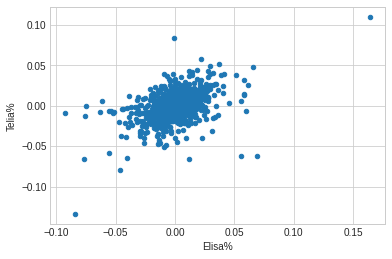

In [18]:
# Muutosprosenttien positiivinen korrelaatio näkyy hyvin hajontakaaviossa
muutokset.plot.scatter(x = 'Elisa%', y = 'Telia%')

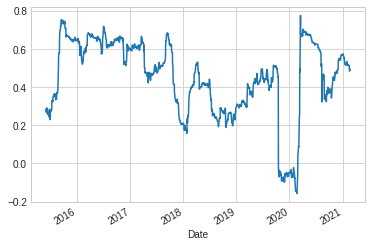

In [19]:
# Liukuva korrelaatio kertoo miten muutosprosentit korreloivat eri aikoina
muutokset['Elisa%'].rolling(100).corr(muutokset['Telia%']).plot()

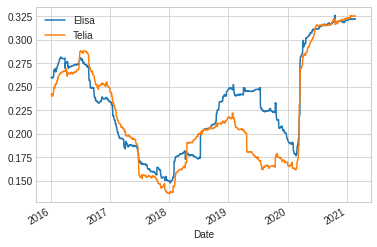

In [20]:
# 252 päivän liukuva volatiliteetti
(muutokset['Elisa%'].rolling(252).std() * (252**0.5)).plot(label = 'Elisa', legend = True)
(muutokset['Telia%'].rolling(252).std() * (252**0.5)).plot(label = 'Telia', legend = True)

(3.0, 7.0)

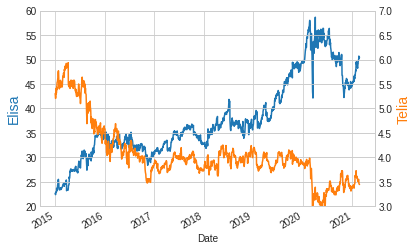

In [21]:
# Viivakaavio Elisan päätöshinnoista (axe)
axe = elisa['Close'].plot(color = 'C0')

# Elisan nimi, väri ja fonttikoko
axe.set_ylabel('Elisa', color = 'C0', fontsize = 14)

# Elisan arvoakselin skaalaus
axe.set_ylim(20, 60)

# Luon Telialle toisen axes-olion (axt), jolla on yhteinen x-akseli axe-olion kanssa
axt = axe.twinx()

# Viivakaavio Telian päätöshinnoista
telia['Close'].plot(ax = axt, color = 'C1')

# Telian nimi, väri ja fonttikoko
axt.set_ylabel('Telia', color = 'C1', fontsize = 14)

# Telian arvoakselin skaalaus
axt.set_ylim(3, 7)